In [28]:
pip install google-play-scraper

In [29]:
#!pip install -qq google_play_scraper
!pip install -q transformers

In [30]:
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

In [31]:
reviews_data = reviews_all('com.msorgdevelopers.bestdatanig',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [32]:
reviews_data

[{'reviewId': 'fd8fd45f-6487-4645-a853-caf60643f27a',
  'userName': 'Ashi Prince',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUMTOMtE6zYe8MW_PFoXEv-aeK9dOneQIpe0DQDWdoqwrdlpak',
  'content': 'These app is scam they cut charge from me 2 times I tried to fund my account and since I fund account they no gree me buy data am deleting these apps',
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.0',
  'at': datetime.datetime(2024, 12, 28, 20, 48, 16),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '1.0.0'},
 {'reviewId': 'e03c5846-b73f-4687-bf15-136b697137ea',
  'userName': 'Mohammed Rabiu',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocJlJRFXMPTc_JmrqSK_XFb14KvW0TYEG3E9tUqYHScFSf7t6w=mo',
  'content': "I just registered newly and they're telling me I can't log in with my credentials",
  'score': 1,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '1.0.0',
  'at': datetime.datetime(2024, 12, 28, 20, 46, 59),
  'replyContent':

In [33]:
# convert the json data into a dataframe
reviews_data_df = pd.json_normalize(reviews_data)

In [34]:
reviews_data_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fd8fd45f-6487-4645-a853-caf60643f27a,Ashi Prince,https://play-lh.googleusercontent.com/a-/ALV-U...,These app is scam they cut charge from me 2 ti...,1,0,1.0.0,2024-12-28 20:48:16,None,NaT,1.0.0
1,e03c5846-b73f-4687-bf15-136b697137ea,Mohammed Rabiu,https://play-lh.googleusercontent.com/a/ACg8oc...,I just registered newly and they're telling me...,1,0,1.0.0,2024-12-28 20:46:59,None,NaT,1.0.0
2,abebbfad-054c-476b-9f71-61eb600b7261,Congratulation Joshua 247 DATA,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,0,None,2024-12-27 12:53:56,None,NaT,None
3,bc480b01-61ed-4be3-8a11-c6adada676db,Godswill Akor,https://play-lh.googleusercontent.com/a/ACg8oc...,Love this app allot. Interface is so friendly.,5,0,1.0.0,2024-12-26 16:55:23,None,NaT,1.0.0
4,3ff73824-7054-4df0-b62f-76164f3ae333,Justice Chiemerie,https://play-lh.googleusercontent.com/a-/ALV-U...,this platform I recommend for everyone it's th...,5,0,1.0.0,2024-12-25 12:51:28,None,NaT,1.0.0


In [35]:
reviews_data_df.shape

(403, 11)

In [36]:
reviews_data_df['score'].value_counts()

5    199
1    159
4     20
3     15
2     10
Name: score, dtype: int64

## Sentiment Analysis

In [37]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = r"appreview"  # Directory to save the model

In [38]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [40]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

Device set to use cpu
Device set to use cpu


In [41]:
# Test the reused model
# play with the parameter and see if it works

result = sentiment_analysis_reuse("I love this app")
print(result)

[{'label': 'POSITIVE', 'score': 0.9988906979560852}]


In [42]:
#removing wildcharacter and cleaning the content column by casting to a str
reviews_data_df['content_new']= reviews_data_df['content'].astype('str')

In [46]:
#reviews_data_df['result'] =reviews_data_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))
reviews_data_df['result'] =reviews_data_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x, truncation=True, max_length=200))

In [47]:
reviews_data_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,fd8fd45f-6487-4645-a853-caf60643f27a,Ashi Prince,https://play-lh.googleusercontent.com/a-/ALV-U...,These app is scam they cut charge from me 2 ti...,1,0,1.0.0,2024-12-28 20:48:16,None,NaT,1.0.0,These app is scam they cut charge from me 2 ti...,"[{'label': 'NEGATIVE', 'score': 0.999505162239..."
1,e03c5846-b73f-4687-bf15-136b697137ea,Mohammed Rabiu,https://play-lh.googleusercontent.com/a/ACg8oc...,I just registered newly and they're telling me...,1,0,1.0.0,2024-12-28 20:46:59,None,NaT,1.0.0,I just registered newly and they're telling me...,"[{'label': 'NEGATIVE', 'score': 0.999497294425..."
2,abebbfad-054c-476b-9f71-61eb600b7261,Congratulation Joshua 247 DATA,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,0,None,2024-12-27 12:53:56,None,NaT,None,Good,"[{'label': 'POSITIVE', 'score': 0.998415231704..."
3,bc480b01-61ed-4be3-8a11-c6adada676db,Godswill Akor,https://play-lh.googleusercontent.com/a/ACg8oc...,Love this app allot. Interface is so friendly.,5,0,1.0.0,2024-12-26 16:55:23,None,NaT,1.0.0,Love this app allot. Interface is so friendly.,"[{'label': 'POSITIVE', 'score': 0.998898029327..."
4,3ff73824-7054-4df0-b62f-76164f3ae333,Justice Chiemerie,https://play-lh.googleusercontent.com/a-/ALV-U...,this platform I recommend for everyone it's th...,5,0,1.0.0,2024-12-25 12:51:28,None,NaT,1.0.0,this platform I recommend for everyone it's th...,"[{'label': 'POSITIVE', 'score': 0.998901128768..."


In [48]:
# spliting the result into sentiment and score
reviews_data_df['sentiment'] = reviews_data_df['result'].apply(lambda x: (x[0]['label']))
reviews_data_df['score'] = reviews_data_df['result'].apply(lambda x: (x[0]['score']))

In [49]:
reviews_data_df[['content','score','sentiment']]

,content,score,sentiment
0,These app is scam they cut charge from me 2 ti...,0.999505,NEGATIVE
1,I just registered newly and they're telling me...,0.999497,NEGATIVE
2,Good,0.998415,POSITIVE
3,Love this app allot. Interface is so friendly.,0.998898,POSITIVE
4,this platform I recommend for everyone it's th...,0.998901,POSITIVE
...,...,...,...
398,Perfect,0.998544,POSITIVE
399,It's Easy to use and Stress-free and reliable,0.998923,POSITIVE
400,Excellent,0.998581,POSITIVE
401,Besrdatang is the best,0.998211,POSITIVE


In [50]:
reviews_data_df.value_counts('sentiment', normalize = True)

sentiment
POSITIVE    0.560794
NEGATIVE    0.439206
dtype: float64

In [ ]:
sns.countplot(x = 'sentiment', data = reviews_data_df, palette=["red", "blue"])
plt.title('Sentiment Count')
plt.show()
# review_df['sentiment'].value_counts().plot(kind='bar');

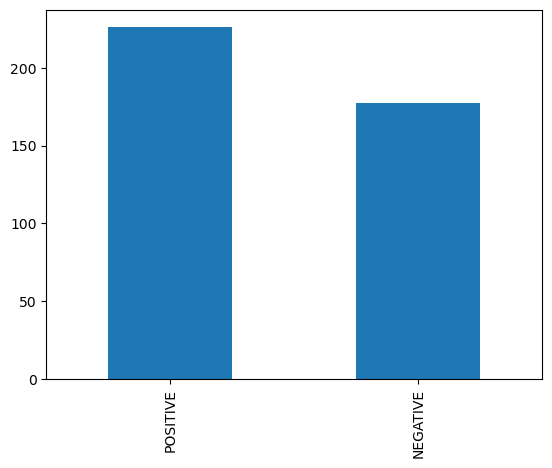

In [51]:
reviews_data_df['sentiment'].value_counts().plot(kind='bar');

## Topic modeling

In [52]:
#generate a series for the reviews
feature_google=reviews_data_df['content']
print(feature_google.size)
feature_google.head()

403


0    These app is scam they cut charge from me 2 ti...
1    I just registered newly and they're telling me...
2                                                 Good
3       Love this app allot. Interface is so friendly.
4    this platform I recommend for everyone it's th...
Name: content, dtype: object

In [54]:
# Import the necessary libraries
!pip install textblob 

from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())


   -------------------------------------- 626.3/626.3 kB 475.4 kB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 158.2 kB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
0    These app is scam they cut charge from me 2 ti...
1    I just registered newly and they're telling me...
2                                                 Good
3       Love this app allot. Interface is so friendly.
4    this platform I recommend for everyone it's th...
Name: content, dtype: object


In [55]:
!pip install bertopic

   -------------------------------------- 811.2/811.2 kB 214.2 kB/s eta 0:00:00


In [56]:
from bertopic import BERTopic

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(feature_google.astype(str))

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [57]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,67,-1_to_it_is_app,"[to, it, is, app, the, my, and, you, this, not]",[It was so unfortunate for me to use this App....
1,0,98,0_app_good_and_fast,"[app, good, and, fast, very, is, the, to, this...","[Very good app, Very good app, Very good app]"
2,1,70,1_best_data_the_and,"[best, data, the, and, app, ever, is, this, wi...","[The best data app ever, Best data app, The be..."
3,2,57,2_good_best_awesome_excellent,"[good, best, awesome, excellent, perfect, nice...","[Good, Good, Good]"
4,3,53,3_to_money_my_app,"[to, money, my, app, this, is, scam, the, acco...",[This app doesnt even deserve 1star coz i did ...
5,4,33,4_data_it_the_and,"[data, it, the, and, for, is, my, app, they, b...",[This best data nig app is getting worse day b...
6,5,25,5_to_in_the_login,"[to, in, the, login, app, log, it, is, my, me]",[While trying to log in my best data account i...


In [58]:
reviews_data_df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'content_new', 'result', 'sentiment'],
      dtype='object')

In [59]:
# the data to excel
output_file = 'playstore_reviews.xlsx'
reviews_data_df.to_excel(output_file, index=False)

In [60]:
pip install mysql-connector-python --upgrade


   ---------------------------------------- 16.1/16.1 MB 64.1 kB/s eta 0:00:00


## ETL code

In [ ]:
Kindly rename your dataframe for this to work 

In [61]:
dataframe=reviews_data_df

In [62]:
data = [tuple(row) for row in reviews_data_df.to_numpy()]

In [63]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [64]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [65]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [67]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': 'password@/12',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """

    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Database 'playstore_reviews' does not exist. Creating it...
Database 'playstore_reviews' created successfully!
Table `playstore_reviews` created successfully!
403 rows inserted/updated successfully!
MySQL connection closed.


In [68]:
df = pd.read_excel('playstore_reviews.xlsx')